Plotting Support
================

This example demonstrates the use of the plotting functions in module [plot](http://sporco.rtfd.org/en/latest/modules/sporco.plot.html#module-sporco.plot), which provide a simplified interface to certain [matplotlib](http://matplotlib.org>) plotting functions.

In [1]:
from __future__ import print_function
from builtins import input

import numpy as np

from sporco import plot
plot.config_notebook_plotting()
from sporco import util
from sporco import signal

Define an `x` array and three 1-d functions of it.

In [2]:
x = np.linspace(-1, 1, 101)
y1 = np.abs(x)
y2 = np.abs(x)**1.5
y3 = x**2

Plot the three functions on the same axes.

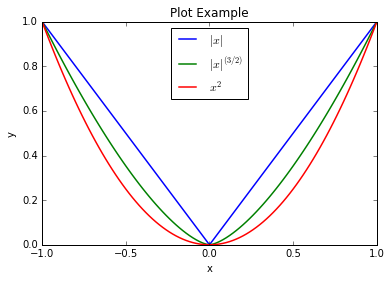

In [3]:
plot.plot(np.stack((y1, y2, y3)).T, x, xlbl='x', ylbl='y',
        title='Plot Example', lgnd=('$|x|$', '$|x|^{(3/2)}$', '$x^2$'),
        lglc='upper center')

We can also create a plot and then add to it. In this case we need to create the figure object separately and pass it as argument to the [plot.plot](http://sporco.rtfd.org/en/latest/modules/sporco.plot.html#sporco.plot.plot) function so that it doesn't automatically call `fig.show` after the first plot call.

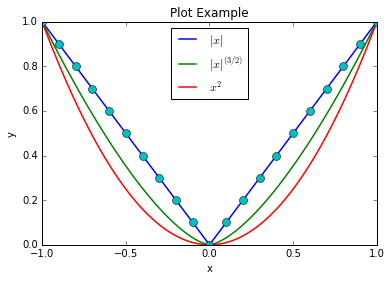

In [4]:
fig = plot.figure()
plot.plot(np.stack((y1, y2, y3)).T, x, xlbl='x', ylbl='y',
        title='Plot Example', lgnd=('$|x|$', '$|x|^{(3/2)}$', '$x^2$'),
        lglc='upper center', fig=fig)
plot.plot(y1[::5], x[::5], lw=0, ms=8.0, marker='o', fig=fig)
fig.show()

Define `x` and `y` arrays and a 2-d surface on `x`, `y`.

In [5]:
x = np.linspace(0, 2, 50)[np.newaxis, :]
y = np.linspace(-1, 1, 51)[:, np.newaxis]
z = np.sin(y) * np.cos(2*x*y)

Plot a surface plot of the surface, including contour lines at the bottom of the `z` axis.

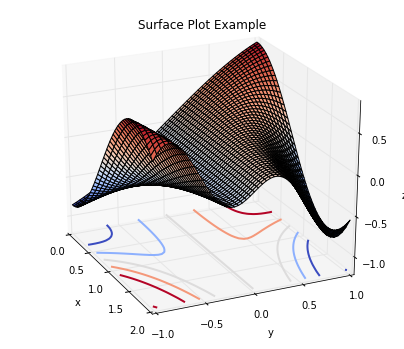

In [6]:
plot.surf(z, x, y, elev=25, azim=-25, xlbl='x', ylbl='y', zlbl='z',
        title='Surface Plot Example', cntr=5, fgsz=(7, 6))

Plot a contour plot of the same surface.

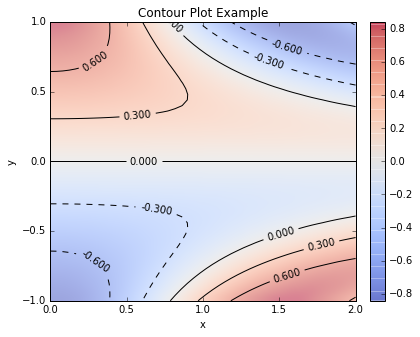

In [7]:
plot.contour(z, x, y, xlbl='x', ylbl='y', title='Contour Plot Example',
            fgsz=(6, 5))

We can also plot within subplots of the same figure.

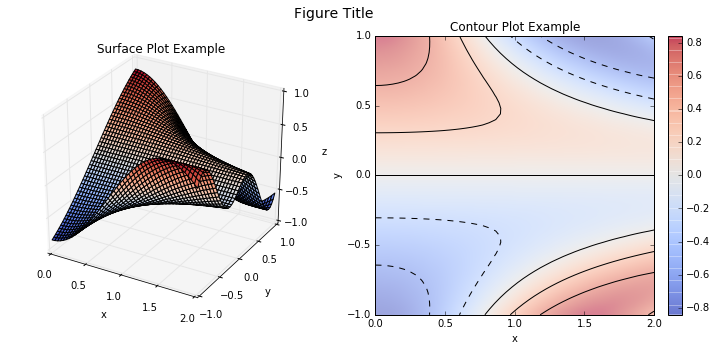

In [8]:
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(12.1, 5))
fig.suptitle('Figure Title', fontsize=14)
plot.surf(z, x, y, xlbl='x', ylbl='y', zlbl='z', title='Surface Plot Example',
        fig=fig, ax=ax[0])
plot.contour(z, x, y, xlbl='x', ylbl='y', title='Contour Plot Example',
        fig=fig, ax=ax[1])
fig.show()

Load an example colour image and create a corresponding grayscale version.

In [9]:
imgc = util.ExampleImages().image('kodim23.png', scaled=True,
                                idxexp=np.s_[150:500, 30:380])
imgg = signal.rgb2gray(imgc)

Display the example colour image.

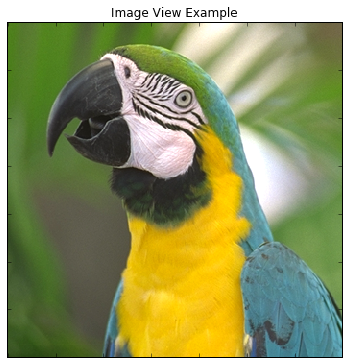

In [10]:
plot.imview(imgc, title='Image View Example', fgsz=(6, 6))

Display the grayscale image with a false-colour colour map, with a
colour bar display of the color map.

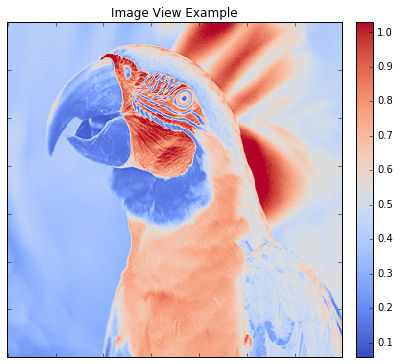

In [11]:
plot.imview(imgg, cmap=plot.cm.coolwarm, title='Image View Example',
            cbar=True, fgsz=(7, 6))

We can view both images as subplots within the same figure, but the colour bar on the second image changes its aspect ratio, which has the undesirable result of the two images being displayed with different sizes.

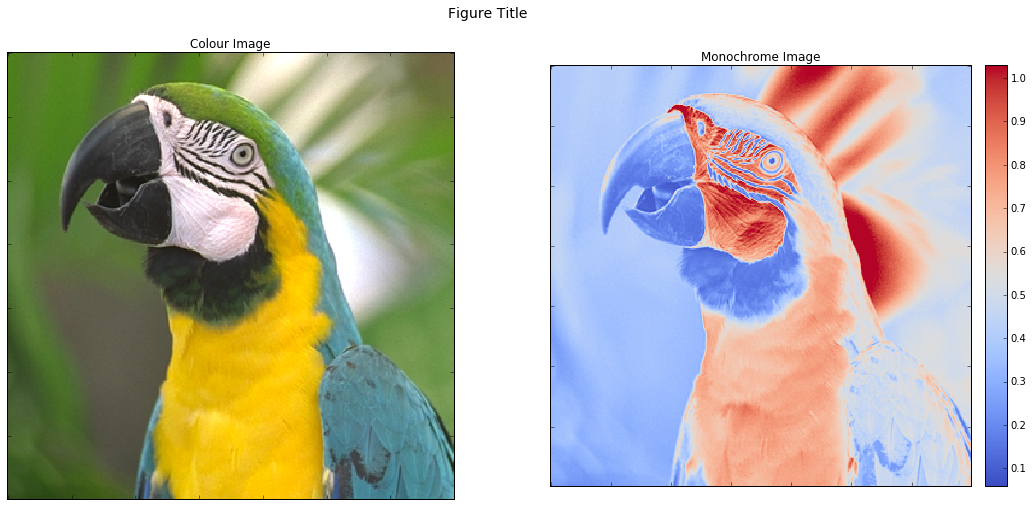

In [12]:
fig, ax = plot.subplots(nrows=1, ncols=2, figsize=(18, 8))
fig.suptitle('Figure Title', fontsize=14)
plot.imview(imgc, title='Colour Image', fig=fig, ax=ax[0])
plot.imview(imgg, cmap=plot.cm.coolwarm, title='Monochrome Image',
            cbar=True, fig=fig, ax=ax[1])
fig.show()

One solution is to adjust the ratios of the widths of the two subplots. We can also share x and y axes so that a zoom in one image is replicated in the other (this is, of course, only possible in the interactive version of this demonstration script).

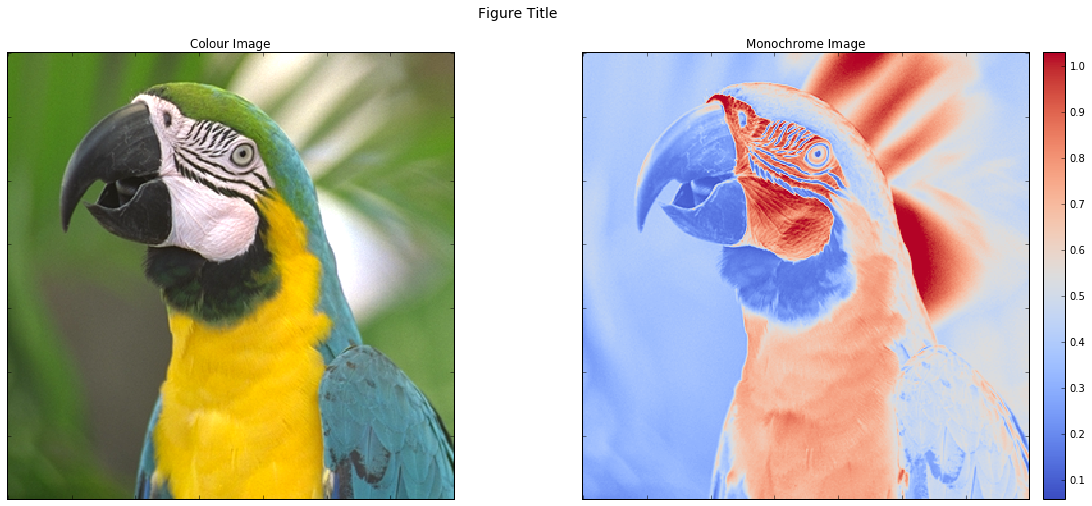

In [13]:
fig, ax = plot.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                        gridspec_kw={'width_ratios': [1, 1.07]},
                        figsize=(19.5, 8))
fig.suptitle('Figure Title', fontsize=14)
plot.imview(imgc, title='Colour Image', fig=fig, ax=ax[0])
plot.imview(imgg, cmap=plot.cm.coolwarm, title='Monochrome Image',
            cbar=True, fig=fig, ax=ax[1])
fig.show()

An alternative solution is to add an invisible colorbar to the first image so that they have the same size. This can be achieved by setting `cbar=None` instead of `cbar=True`.

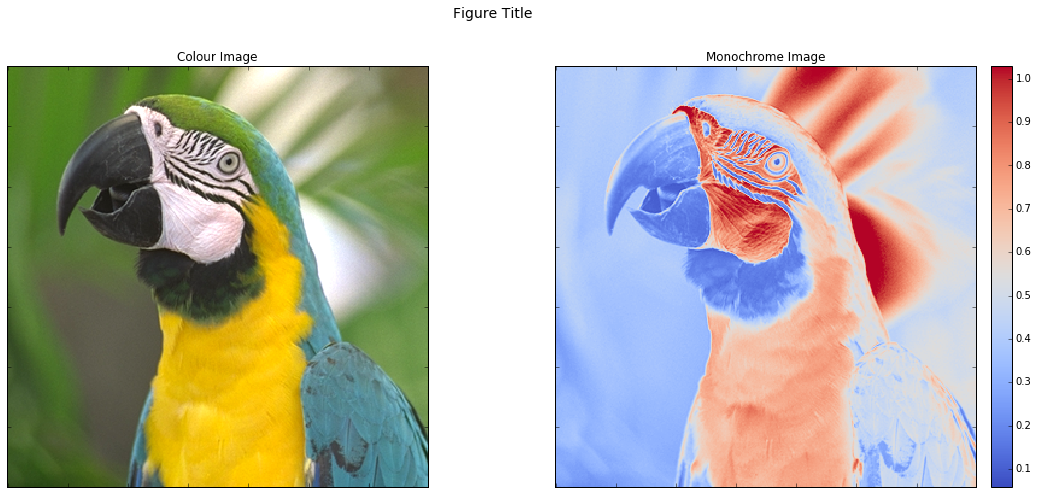

In [14]:
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plot.subplots(nrows=1, ncols=2, sharex=True, sharey=True,
                        figsize=(18, 8))
fig.suptitle('Figure Title', fontsize=14)
plot.imview(imgc, title='Colour Image', cbar=None, fig=fig, ax=ax[0])
plot.imview(imgg, cmap=plot.cm.coolwarm, title='Monochrome Image',
            cbar=True, fig=fig, ax=ax[1])
fig.show()